In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

# Read Zomato.csv, if it generates error, upload the zomato.csv in the files section. (Or u can find it from here https://drive.google.com/drive/folders/17nFvA2hou50dk1hVm0CjrG4k6ORkD6NO)

In [0]:
df = pd.read_csv('zomato.csv', encoding="ISO-8859-1")

#df.columns, will list all the columns in the dataframe.

In [4]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

#unique function will give us all the list of curriecies in the currency dataset.

In [5]:
df["Currency"].unique()

array(['Botswana Pula(P)', 'Brazilian Real(R$)', 'Dollar($)',
       'Emirati Diram(AED)', 'Indian Rupees(Rs.)',
       'Indonesian Rupiah(IDR)', 'NewZealand($)', 'Pounds(\x8c£)',
       'Qatari Rial(QR)', 'Rand(R)', 'Sri Lankan Rupee(LKR)',
       'Turkish Lira(TL)'], dtype=object)

# Print AverageCost for two with Currency in dataFrame format. [[]] (double brackets will generate the dataframe), [] (Single brakcet will generate the data series)

In [0]:
df[["Average Cost for two", "Currency"]]

,Average Cost for two,Currency
0,1100,Botswana Pula(P)
1,1200,Botswana Pula(P)
2,4000,Botswana Pula(P)
3,1500,Botswana Pula(P)
4,1500,Botswana Pula(P)
5,1000,Botswana Pula(P)
6,2000,Botswana Pula(P)
7,2000,Botswana Pula(P)
8,6000,Botswana Pula(P)
9,1100,Botswana Pula(P)


# As I could not able to find the currency mapping data set from internet, I have created the dictonary.

In [0]:
dict1 = {"Botswana Pula(P)" : 10.79, "Brazilian Real(R$)" : 3.86,"Dollar" : 1, "Emirati Diram(AED)" : 3.67, "Indian Rupees(Rs.)" : 69.34,"NewZealand($)" :1.52, "Pounds(\x8c£)" : 0.79, "Qatari Rial(QR)" : 3.64, "Rand(R)" :14.67, "Sri Lankan Rupee(LKR)" :176.44, "Turkish Lira(TL)" :5.76}

# Now Create the DataFrame from the dict and print it to check if it correctly mapped.

In [0]:
currency_conv_df = pd.DataFrame()

In [0]:
currency_conv_df["Currency"] = list(dict1.keys())

In [0]:
currency_conv_df["Currency_Conv"] = list(dict1.values())

In [11]:
currency_conv_df

,Currency,Currency_Conv
0,Botswana Pula(P),10.79
1,Brazilian Real(R$),3.86
2,Dollar,1.00
3,Emirati Diram(AED),3.67
4,Indian Rupees(Rs.),69.34
5,NewZealand($),1.52
6,Pounds(£),0.79
7,Qatari Rial(QR),3.64
8,Rand(R),14.67
9,Sri Lankan Rupee(LKR),176.44


#now merge the currency convert dataframe into the our main dataframe.

In [0]:
df = df.merge(currency_conv_df)

# Now create a new column called "NormalizedCost" by dividing AverageCostForTwo with CurrencyConv to get all the Cost in Dollars. And print it.

In [0]:
df[["Currency", "Average Cost for two", "Currency_Conv"]]
df["NormalizedCost"] = df["Average Cost for two"]/df["Currency_Conv"]

In [14]:
df[["Currency", "Average Cost for two", "Currency_Conv", "NormalizedCost"]]

,Currency,Average Cost for two,Currency_Conv,NormalizedCost
0,Botswana Pula(P),1100,10.79,101.946247
1,Botswana Pula(P),1200,10.79,111.214087
2,Botswana Pula(P),4000,10.79,370.713624
3,Botswana Pula(P),1500,10.79,139.017609
4,Botswana Pula(P),1500,10.79,139.017609
5,Botswana Pula(P),1000,10.79,92.678406
6,Botswana Pula(P),2000,10.79,185.356812
7,Botswana Pula(P),2000,10.79,185.356812
8,Botswana Pula(P),6000,10.79,556.070436
9,Botswana Pula(P),1100,10.79,101.946247


# As we have all the data with Normalized cost in dollars, we can use seaborn lib to print the box plot with Rating Text.

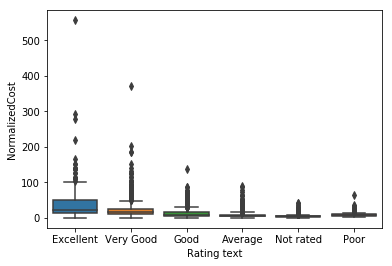

In [15]:
sb.boxplot(y = 'NormalizedCost', x = 'Rating text', data = df)

In [0]:
df.[["City","Address"]]

,City,Address
0,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu..."
1,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi..."
2,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal..."
3,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O..."
4,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas..."
5,Mandaluyong City,"Ground Floor, Mega Fashion Hall, SM Megamall, ..."
6,Pasay City,"Building K, SM By The Bay, Sunset Boulevard, M..."
7,Pasay City,"Building B, By The Bay, Seaside Boulevard, Mal..."
8,Pasay City,"Plaza Level, Sofitel Philippine Plaza Manila, ..."
9,Pasig City,"Brixton Technology Center, 10 Brixton Street, ..."
